In [3]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/Documents/GitHub/LTY-Spectral-Classification/data files/model_results.csv')

In [3]:
df.sort_values(by="rmse")

,model,dataset,rmse,r2,within_1,within_2
7,XGB Regressor,3-band,0.957075,0.872722,0.933131,0.981763
4,MLP Regressor,2-band,1.876388,0.916318,0.649254,0.839552
6,XGB Regressor,2-band,1.927805,0.911669,0.682836,0.854478
2,Random Forest,2-band,2.127000,0.892472,0.679104,0.845149
3,Random Forest,3-band,2.127000,0.884929,0.759878,0.933131
5,MLP Regressor,3-band,2.156734,0.788461,0.659574,0.860182
0,Linear Regressor,2-band,2.197179,0.727289,0.538710,0.787097
1,Linear Regressor,3-band,2.197179,0.727289,0.538710,0.787097


In [9]:
sns.set(style="whitegrid", context="talk")


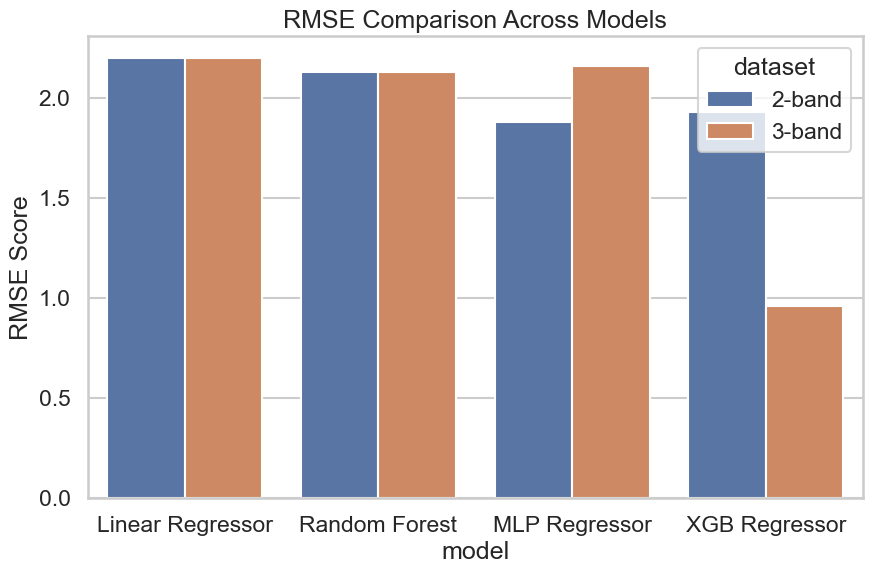

In [10]:
#create bar graph comparing models and their rmse values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="rmse", hue="dataset")
plt.title("RMSE Comparison Across Models")
plt.ylabel("RMSE Score")
plt.show()


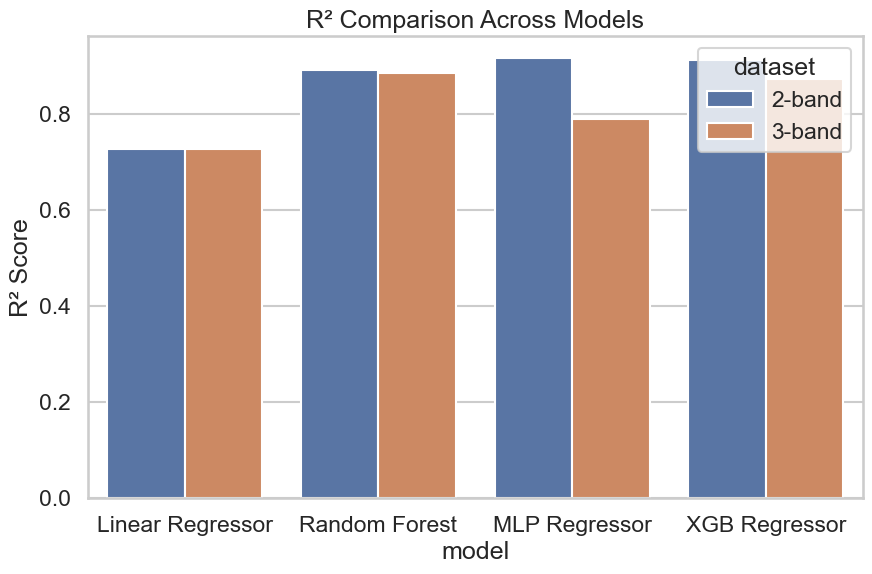

In [11]:
#create bar graph comparing models and their r2 values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="r2", hue="dataset")
plt.title("R² Comparison Across Models")
plt.ylabel("R² Score")
plt.show()


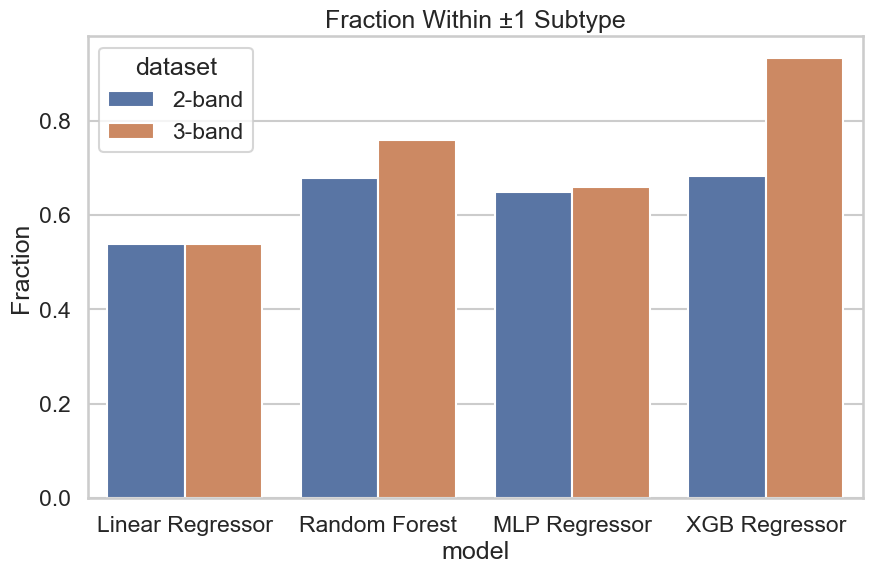

In [12]:
#create bar graph comparing models and their within 1 subtype values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="within_1", hue="dataset")
plt.title("Fraction Within ±1 Subtype")
plt.ylabel("Fraction")
plt.show()


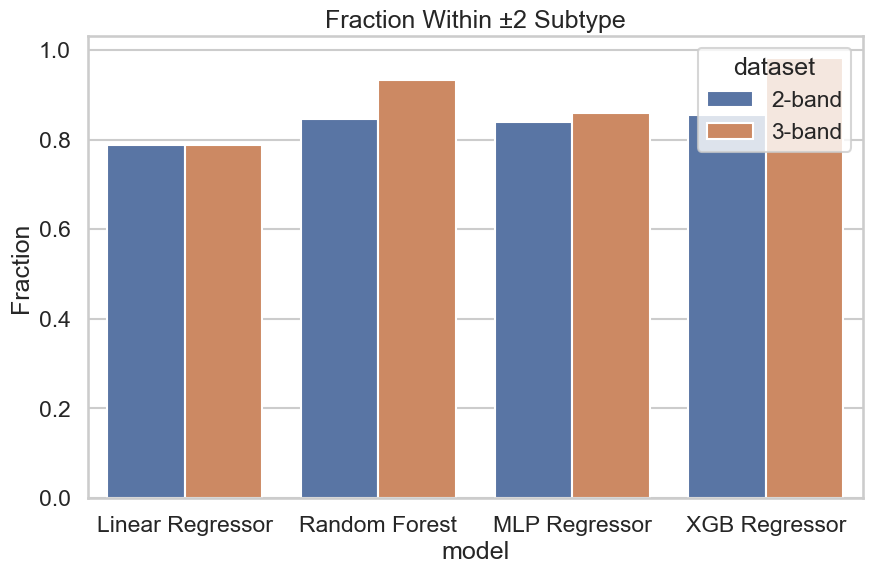

In [13]:
#create bar graph comparing models and their within 2 subtype values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="within_2", hue="dataset")
plt.title("Fraction Within ±2 Subtype")
plt.ylabel("Fraction")
plt.show()

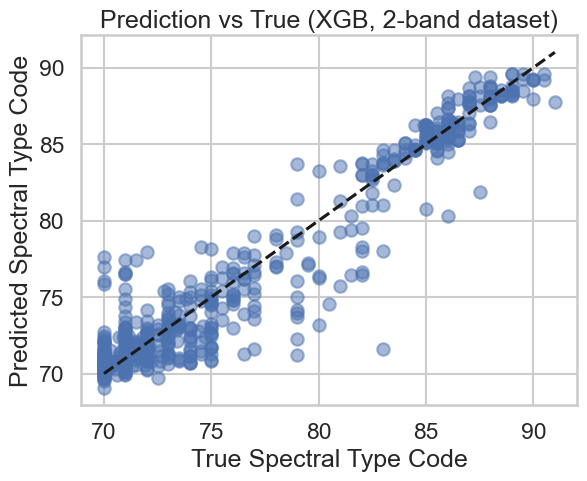

In [16]:
import model_training.model_imports as mi
import os

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_2band.npy")
y_pred = np.load(path)
plt.scatter(mi.y_test, y_pred, alpha=0.5)
plt.plot([mi.y_test.min(), mi.y_test.max()], [mi.y_test.min(), mi.y_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 2-band dataset)")
plt.show()


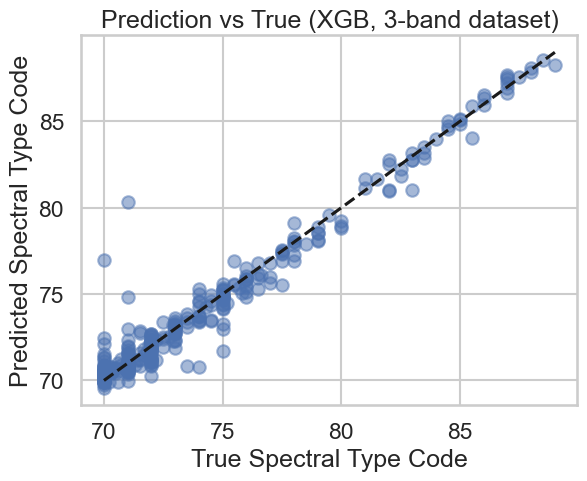

In [18]:
path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_3band.npy")
y_pred_3band = np.load(path)
plt.scatter(mi.y_3bands_test, y_pred_3band, alpha=0.5)
plt.plot([mi.y_3bands_test.min(), mi.y_3bands_test.max()], [mi.y_3bands_test.min(), mi.y_3bands_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 3-band dataset)")
plt.show()


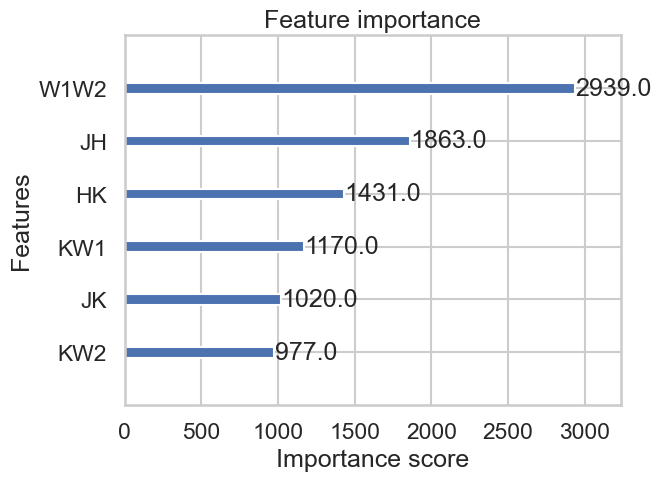

In [ ]:
#feature importance for xgboost model
#2 band model
import matplotlib.pyplot as plt
import xgboost as xgb

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_2band.npy")
xgb_model_2band = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_2band, max_num_features=10)
plt.show()

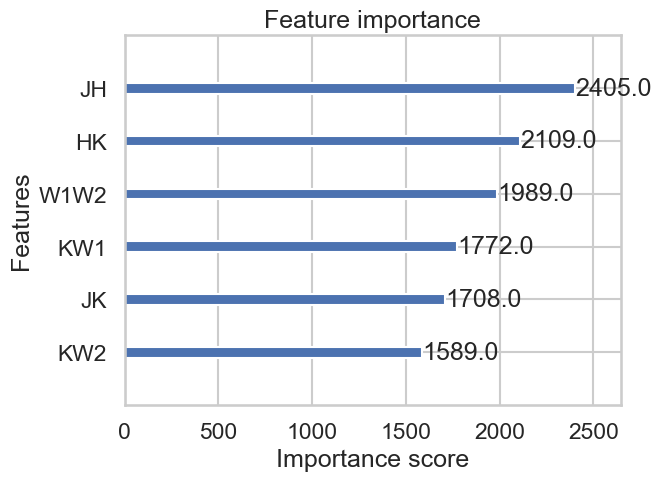

In [23]:
#3 band model 

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_3band.npy")
xgb_model_3band = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_3band, max_num_features=10)
plt.show()

In [24]:
#errors 2 band model xgboost
df_err = pd.DataFrame({"true": mi.y_test, "pred": y_pred})
df_err["error"] = df_err["pred"] - df_err["true"]

df_err.groupby("true").error.mean()
df_err.groupby("true").error.std()

true
70.0    1.455671
70.2    0.284468
70.3    0.517119
70.4         NaN
70.5    0.199270
          ...   
89.0    0.560245
89.5    0.568958
90.0    0.618087
90.5    0.287332
91.0         NaN
Name: error, Length: 70, dtype: float64

In [25]:
#errors 3 band model xgboost
df_err = pd.DataFrame({"true": mi.y_3bands_test, "pred": y_pred_3band})
df_err["error"] = df_err["pred"] - df_err["true"]

df_err.groupby("true").error.mean()
df_err.groupby("true").error.std()

true
70.0    0.894075
70.2    0.555653
70.3    0.202422
70.4         NaN
70.5    0.123601
70.6    0.758816
70.7    0.265203
70.9    0.086457
71.0    1.851244
71.3         NaN
71.4         NaN
71.5    0.864986
71.7    0.254386
71.8         NaN
71.9         NaN
72.0    0.603723
72.2    0.800372
72.5    0.587786
72.8         NaN
72.9    0.669564
73.0    0.444738
73.5    1.231288
74.0    1.151902
74.3         NaN
74.5    0.652139
75.0    0.909744
75.2         NaN
75.5    0.791575
75.7         NaN
75.8         NaN
76.0    0.510478
76.5    0.634857
76.6         NaN
77.0    0.600817
77.5    0.771270
78.0    0.713658
78.5         NaN
79.0    0.342426
79.5         NaN
80.0    0.227581
81.0    0.353305
81.5         NaN
82.0    0.930896
82.5    0.306565
83.0    0.944485
83.5    0.311223
84.0         NaN
84.5    0.220607
85.0    0.138927
85.5    1.276150
86.0    0.278845
87.0    0.396831
87.5         NaN
88.0    0.159341
88.5         NaN
89.0         NaN
Name: error, dtype: float64